# Run this cell first

In [40]:
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  %pip install AutoFeedback
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  %pip install "git+https://github.com/autofeedback-exercises/exercises.git#subdirectory=MTH2031/crashcourse/dsolve"
  from testsrc import test_main

def runtest():
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    unittest.main(argv=[''], module=test_main, exit=False)


# Solving ODES symbollically 

We have already seen the basic tool for solving differential equations in `sympy`: `dsolve`



In [41]:
import sympy as sy
x = sy.Symbol('x')
f = sy.Function('f')(x)
diffeq = sy.Eq(f.diff(x), f)
solution = sy.dsolve(diffeq)
sy.pprint(solution)

           x
f(x) = C₁⋅ℯ 


In order to set up and solve equations of motion with `sympy` we need to go a little further in order to solve for the unknown constant(s) in the solutions provided by `dsolve`.

---

Let's consider the simple harmonic motion equation: 

$$\dfrac{d^2x}{dt^2} = -\omega^2 x,$$

where $\omega$ is a given constant. This equation describes, for instance, the oscillatory motion of a mass attached to a spring. The set-up for the problem is exactly as above: define the symbols, build the differential equation and use `dsolve` to solve.

In [42]:
t, w = sy.symbols('t, omega')
x = sy.Function('x')(t)
diffeq = sy.Eq(x.diff(t, 2), -w**2 * x)
solution = sy.dsolve(diffeq)
sy.pprint(solution)


           -ⅈ⋅ω⋅t       ⅈ⋅ω⋅t
x(t) = C₁⋅ℯ       + C₂⋅ℯ     


Let's think for a second about how we would find the values of the constants $c_1$  and $c_2$ were we solving this 'by hand'. We would take whatever initial conditions we had been given, and substitute the known information into the solution, before solving the resulting equations to determine $c_1$  and $c_2$. The procedure in sympy is exactly the same, but the syntax may be harder to remember.

Let's take as our example the initial conditions 

$$x(t=0) = x_0, \quad \text{ and } \quad \left[\dfrac{dx}{dt}\right]_{t=0} = 0,$$

which corresponds to releasing the mass from rest from a distance $x_0$ from the equilibrium position. We wish to substitute $t=0$ into the right hand side of our solution, and substitute the corresponding values for $x$  and $\frac{dx}{dt}$ into the left hand side. Thankfully `sympy` provides a nice way to take the right (or left) hand side from an equation.

In [43]:
RHS = solution.rhs

C1, C2, x0 = sy.symbols('C1, C2, x0')

ic1 = sy.Eq(RHS.subs(t, 0), x0)        # sub t=0 into RHS, set equal to x0
ic2 = sy.Eq(RHS.diff(t).subs(t, 0), 0) # differentiate RHS, sub in t=0 and set equal to 0
sy.pprint(ic1)
sy.pprint(ic2)

C₁ + C₂ = x₀
-ⅈ⋅C₁⋅ω + ⅈ⋅C₂⋅ω = 0


At this point the variables (equations) `ic1`, and `ic2` form a system of equations (two equations, two unknowns) which we must solve to determine the values of the constants, `C1` and `C2`. Once again, we have previously seen how to do this with with `sy.solve()`

In [44]:

solution_ics = sy.solve([ic1, ic2], (C1, C2))
sy.pprint(solution_ics)

⎧    x₀      x₀⎫
⎨C₁: ──, C₂: ──⎬
⎩    2       2 ⎭


Note the tricky brackets here in the call to `sy.solve`: the equations `ic1` and `ic2` are contained in square brackets, and the target variables, `C1` and `C2` are contained in round brackets.

Now that we have values for `C1` and `C2`, we simply substitute them back into the RHS of our equation for $x(t)$:

In [45]:
particular = RHS.subs(solution_ics)
sy.pprint(particular)

    ⅈ⋅ω⋅t       -ⅈ⋅ω⋅t
x₀⋅ℯ        x₀⋅ℯ      
───────── + ──────────
    2           2     


Those of you thinking that this doesn't look like the solution of the SHM equation that you were expecting will be pleased to know that `sympy` can tidy that expression up for you:

In [46]:
particular = sy.simplify(particular)
sy.pprint(particular)

x₀⋅cos(ω⋅t)


If we want to plot this we can use the skills we learned in previous exercises to create a numerical function for the particular solution as follows. Note that the function requires values for the $\omega$ and $x_0$, which we set as $\omega = 2$ and $x_0 = 1$, for the sake of example. 

Text(0, 0.5, 'x(t) (cm)')

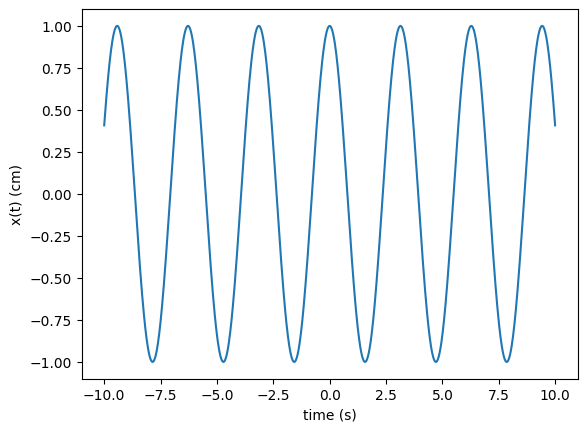

In [52]:
import numpy as np
import matplotlib.pyplot as plt

ny_func = sy.lambdify([t, w, x0], particular)

nt = np.linspace(-10, 10, 1000)
ny = ny_func(nt, 2, 1)
plt.plot(nt, ny)
plt.xlabel('time (s)')
plt.ylabel('x(t) (cm)')

--- 

# TASKS

Consider the second order, inhomogeneous differential equation,

$$\dfrac{d^2y}{dt^2} + 2\dfrac{dy}{dt} + 5y = 5t^2 + 12$$

with the initial conditions 

$$ y(0) = 0 \quad \text{ and } \quad \left[ \dfrac{dy}{dt}\right]_{t=0} = 0$$

Use `sympy.dsolve` and sympy variable substitutions to determine the particular
solution of this diferential system.

1. Store the differential equation in the variable `diffeq`
2. Store the solution of `diffeq` in the variable `solution`
3. Store the initial conditions in `ic1` and `ic2` respectively
4. Store the particular solution in the variable `particular`
---
5. Use lambdify to define a numerical function for particular, call it `particular_func`
6. Define a variable `nt` as 100 equally spaced values between -1 and 1
7. Use `particular_func` to compute the solution for the values in `nt`, store the solution in `ny`
8. Plot the solution (`ny` as a function of `nt`) and label the axes `'t`' and `'y(t)'` as appropriate



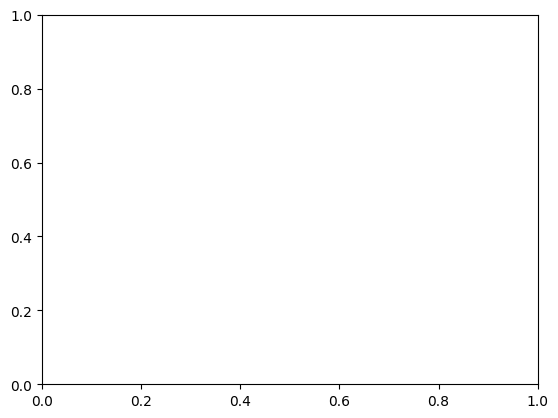

In [ ]:
# your code goes here


# This code is required for the autofeedback- don't delete it!
fighand = plt.gca()

In [ ]:
runtest()


The variable diffeq has the wrong value(s)

        We expected the output:
        Eq(5*y(t) + 2*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 5*t**2 + 12)
        but instead we got:
        Eq(Derivative(x(t), (t, 2)), -omega**2*x(t))
        Try using print(diffeq) to check the values look as you expect them
        to and ensure the expression used to calculate the variable
        is correct.
        

The variable solution has the wrong value(s)

        We expected the output:
        Eq(y(t), t**2 - 4*t/5 + (C1*sin(2*t) + C2*cos(2*t))*exp(-t) + 58/25)
        but instead we got:
        Eq(x(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))
        Try using print(solution) to check the values look as you expect them
        to and ensure the expression used to calculate the variable
        is correct.
        

The variable ic1 has the wrong value(s)

        We expected the output:
        Eq(C2 + 58/25, 0)
        but instead we got:
        Eq(C1 + C2, x0)
        Try using p